In [1]:
library(tidyverse)

── Attaching packages ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6      ✔ purrr   0.3.4 
✔ tibble  3.1.6      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.0 
✔ readr   2.1.3      ✔ forcats 0.5.2 

── Conflicts ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
result_path = "/project/scATAC_analysis/10X_PBMC_analysis/AnnotationQuestion/overlap_bulk_and_scATAC/BOCA2_differential_cCREs/results/"

In [3]:
glutamatergic_neurons_VS_GABAergic_neurons= read.csv(paste(result_path, "glutamatergic_neurons_VS_GABAergic_neurons.csv", sep=""))

In [4]:
glutamatergic_neurons_VS_GABAergic_neurons_df = read.csv(paste(result_path, "glutamatergic_neurons_VS_GABAergic_neurons.csv", sep=""))
glutamatergic_neurons_VS_oligodendrocytes_df = read.csv(paste(result_path, "glutamatergic_neurons_VS_oligodendrocytes.csv", sep=""))
glutamatergic_neurons_VS_microglia_and_astrocytes_df = read.csv(paste(result_path, "glutamatergic_neurons_VS_microglia_and_astrocytes.csv", sep=""))
GABAergic_neurons_VS_oligodendrocytes_df = read.csv(paste(result_path, "GABAergic_neurons_VS_oligodendrocytes.csv", sep=""))
GABAergic_neurons_VS_microglia_and_astrocytes_df = read.csv(paste(result_path, "GABAergic_neurons_VS_microglia_and_astrocytes.csv", sep=""))
microglia_and_astrocytes_VS_oligodendrocytes_df = read.csv(paste(result_path, "microglia_and_astrocytes_VS_oligodendrocytes.csv", sep=""))



In [5]:
combined_regions_top5000 =c()
for (df_ in list(glutamatergic_neurons_VS_GABAergic_neurons_df, glutamatergic_neurons_VS_oligodendrocytes_df,glutamatergic_neurons_VS_microglia_and_astrocytes_df,GABAergic_neurons_VS_oligodendrocytes_df,GABAergic_neurons_VS_microglia_and_astrocytes_df,microglia_and_astrocytes_VS_oligodendrocytes_df)){
    df_= df_[df_[["seqnames"]] !="chrY",]
    top5000_regions = df_[sort(abs(df_[["Fold"]]),decreasing=T,index.return=T)[[2]],][1:5000,][["region"]]
    top5000_merged_name = gsub(":", "_", gsub("-", "_", top5000_regions, fixed = TRUE) , fixed = TRUE)
    combined_regions_top5000 =  c(combined_regions_top5000,top5000_merged_name )
}

In [6]:
length(combined_regions_top5000)

[1] 30000

In [7]:
combined_regions_top5000_sorted = sort(combined_regions_top5000)

In [8]:
combined_regions_top50000_3col = as.data.frame(combined_regions_top5000_sorted) %>% 
   separate(combined_regions_top5000_sorted, into = c("seq", "start", "end"), sep="_")


In [9]:
head(combined_regions_top50000_3col)

,seq,start,end
,<chr>,<chr>,<chr>
1,chr10,10007965,10008365
2,chr10,10007965,10008365
3,chr10,100319722,100320122
4,chr10,100319722,100320122
5,chr10,100319722,100320122
6,chr10,100341070,100341470


In [10]:
tail(combined_regions_top50000_3col)


,seq,start,end
,<chr>,<chr>,<chr>
29995,chrX,9899622,9900022
29996,chrX,9926015,9926415
29997,chrX,9940369,9940769
29998,chrX,9940369,9940769
29999,chrX,9940369,9940769
30000,chrX,9955507,9955907


In [11]:
write.table(combined_regions_top50000_3col, "../../../data/BOCA2_bulk_ATAC/03_get_differentially_accessible_regions/Boca2_pairwise_differential_cCREs_FDR0.05_top5000_of_each_pair.bed", sep = "\t", col.names=FALSE,quote=FALSE, row.names = FALSE)


# get the regions matching to ENCODE cCRE regions

> cd ../../../data/BOCA2_bulk_ATAC/03_get_differentially_accessible_regions


> sort-bed Boca2_pairwise_differential_cCREs_FDR0.05_top5000_of_each_pair.bed  > Boca2_pairwise_differential_cCREs_FDR0.05_top5000_of_each_pair_sorted.bed 

> bedops --element-of 1 ../../../../scATAcat_notebooks_for_paper/jan2024/data/ENCODE_cCREs/V2.hg38-cCREs-3col_sorted.bed  Boca2_pairwise_differential_cCREs_FDR0.05_top5000_of_each_pair_sorted.bed > Boca2_pairwise_differential_cCREs_FDR0.05_top5000_of_each_pair_sorted_exactCREs.bed

In [12]:
exact_match_differential_cCREs_top5000_ = read.table("../../..//data/BOCA2_bulk_ATAC/03_get_differentially_accessible_regions/Boca2_pairwise_differential_cCREs_FDR0.05_top5000_of_each_pair_sorted_exactCREs.bed", header = FALSE, sep="\t")

In [13]:
head(exact_match_differential_cCREs_top5000_)

,V1,V2,V3
,<chr>,<int>,<int>
1,chr1,817080,817403
2,chr1,1019286,1019502
3,chr1,1019522,1019869
4,chr1,1020056,1020215
5,chr1,1020226,1020401
6,chr1,1157435,1157785


In [14]:
dim(exact_match_differential_cCREs_top5000_)

[1] 25473     3

In [15]:
exact_match_differential_cCREs_top5000_["region"]=paste(exact_match_differential_cCREs_top5000_$V1, exact_match_differential_cCREs_top5000_$V2, exact_match_differential_cCREs_top5000_$V3, sep="_")

In [16]:
head(exact_match_differential_cCREs_top5000_)

,V1,V2,V3,region
,<chr>,<int>,<int>,<chr>
1,chr1,817080,817403,chr1_817080_817403
2,chr1,1019286,1019502,chr1_1019286_1019502
3,chr1,1019522,1019869,chr1_1019522_1019869
4,chr1,1020056,1020215,chr1_1020056_1020215
5,chr1,1020226,1020401,chr1_1020226_1020401
6,chr1,1157435,1157785,chr1_1157435_1157785


In [17]:
write.table(exact_match_differential_cCREs_top5000_["region"], "../../../data/BOCA2_bulk_ATAC/03_get_differentially_accessible_regions/Boca2_pairwise_differential_cCREs_FDR0.05_top5000_of_each_pair_sorted_exactCREs.csv", sep = ",", col.names=FALSE,quote=FALSE, row.names = FALSE)


# export number of regions per comparison

In [18]:
df_list = list(glutamatergic_neurons_VS_GABAergic_neurons_df, glutamatergic_neurons_VS_oligodendrocytes_df,glutamatergic_neurons_VS_microglia_and_astrocytes_df,GABAergic_neurons_VS_oligodendrocytes_df,GABAergic_neurons_VS_microglia_and_astrocytes_df,microglia_and_astrocytes_VS_oligodendrocytes_df)

names(df_list) <- c("GLU_VS_GABA", 
                    "GLU_VS_OLIG", 
                    "GLU_VS_MGAS", 
                    "GABA_VS_OLIG", 
                    "GABA_VS_MGAS", 
                    "MGAS_VS_OLIG")

# Assuming the names are now set as above
df_summary <- data.frame(Name = names(df_list), 
                         NumberOfDiffRegions = sapply(df_list, nrow))

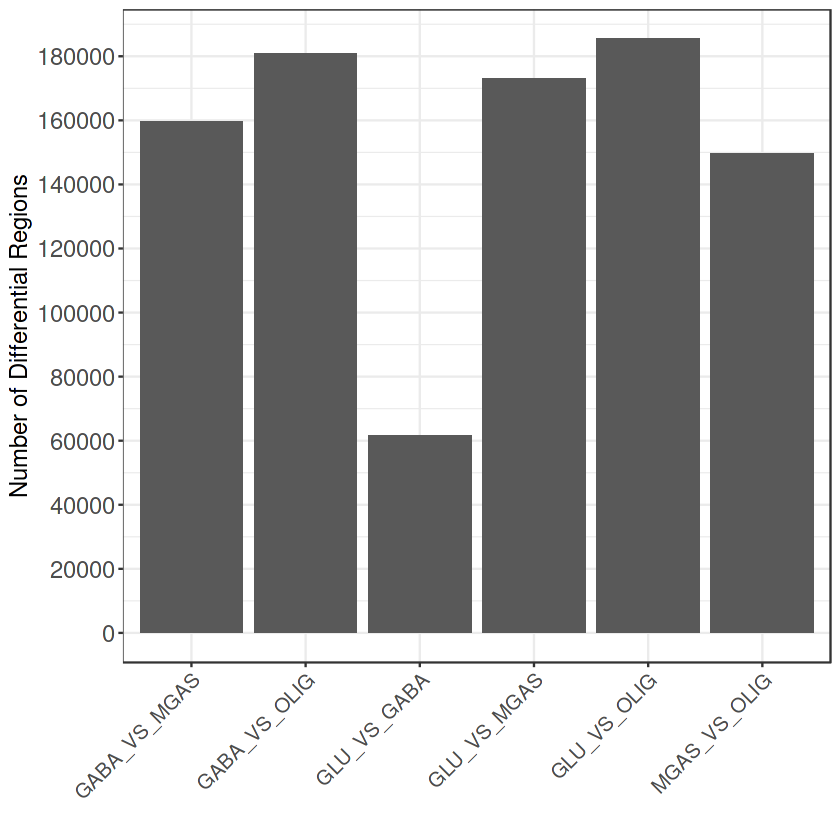

In [19]:

library(ggplot2)
ggplot(df_summary, aes(x = Name, y = NumberOfDiffRegions)) +
  geom_bar(stat = "identity") +
  theme_bw()+
  theme(axis.text.x = element_text(c(),angle = 45, hjust = 1, size = 12),
        axis.text.y = element_text(size = 14), # Adjust y-axis tick labels
        axis.title.x = element_text(size = 14), # Adjust x-axis title
        axis.title.y = element_text(size = 14)) + # Adjust y-axis title
  labs(x = "", y = "Number of Differential Regions")+
  scale_y_continuous(breaks = seq(0, max(df_summary$NumberOfDiffRegions), by = 20000)) # Customize this part

In [20]:
ggsave("../../../data/BOCA2_bulk_ATAC/03_get_differentially_accessible_regions/per_comparison_numb_of_regions.png", width = 10, height = 10) # Adjust width and height as needed

In [21]:
write.csv(df_summary,"../../..//data/BOCA2_bulk_ATAC/03_get_differentially_accessible_regions/per_comparison_numb_of_regions.csv", row.names=F)

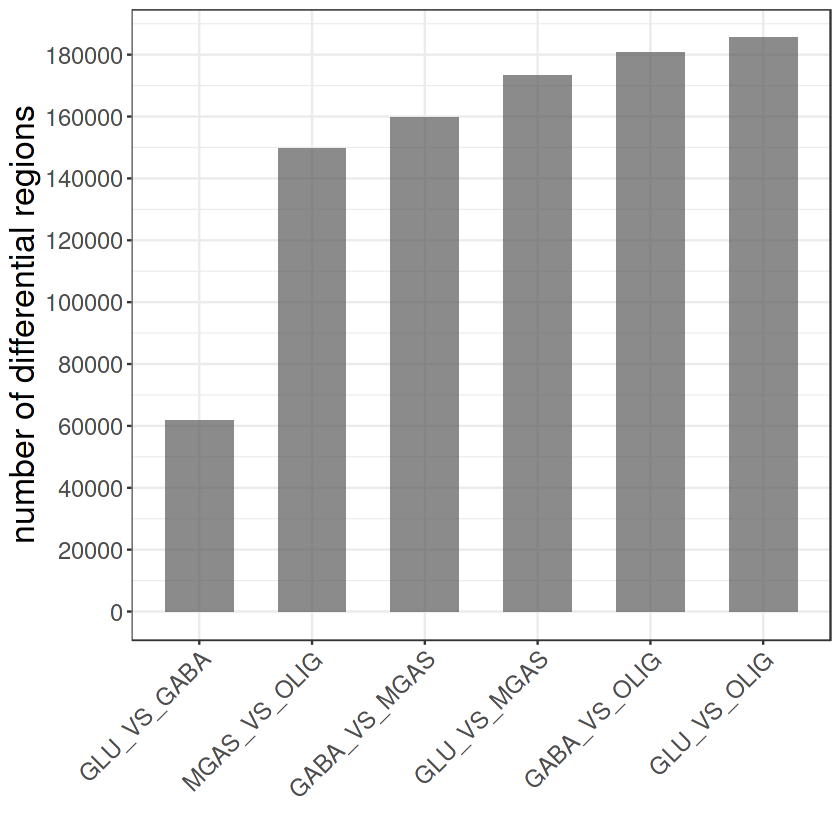

In [24]:
library(ggplot2)
library(dplyr)
library(forcats)
options(scipen = 999)
# Reorder following the value of another column:
plot_num_diff_regions_per_comparison <-df_summary %>%
  mutate(comparisons = fct_reorder(Name, NumberOfDiffRegions)) %>%
  ggplot( aes(y=comparisons, x=NumberOfDiffRegions)) +
    coord_flip() +
    geom_bar(stat="identity", , alpha=.7, width=.6) +
    xlab("") + ylab("number of differential regions") +theme_bw()+


    theme(axis.text.x = element_text(angle = 45, hjust = 1, size = 14),
        axis.text.y = element_text(size = 14), # Adjust y-axis tick labels
        axis.title.x = element_text(size = 14), # Adjust x-axis title
        axis.title.y = element_text(size = 20))+
    labs(y = "", x = "number of differential regions")+ 
    scale_x_continuous(breaks = seq(0, max(df_summary$NumberOfDiffRegions), by = 20000))

plot_num_diff_regions_per_comparison

In [25]:
ggsave("../../..//data/BOCA2_bulk_ATAC/03_get_differentially_accessible_regions/per_comparison_numb_of_regions_v2.png", width = 10, height = 10) # Adjust width and height as needed

In [26]:
ggsave("../../..//data/BOCA2_bulk_ATAC/03_get_differentially_accessible_regions/per_comparison_numb_of_regions_v2.pdf", width = 10, height = 10) # Adjust width and height as needed